In [1]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import imp
from IPython.display import YouTubeVideo
from IPython.display import HTML

In [2]:
from PIL import Image, ImageChops

def trim(im, percent=36):
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        x = im.crop(bbox)
        return x.resize(((x.size[0]*percent)/100, (x.size[1]*percent)/100), Image.ANTIALIAS)

def resize(filename, percent=36):
    trim(Image.open(filename + ".png"), percent).save(filename + "_r" + str(percent) + ".png")

# EECS 545:  Machine Learning
## Lecture 20:  Neural Networks
* Instructor:  **Junhyuk Oh**
* Date:  April 6, 2016

### Outline

- Motivation
- Basics of Neural Networks
  - Forward Propagation
  - Backward Propagation
- Deep Neural Networks
  - Convolutional Neural Networks
  - Recurrent Neural Networks
- Applications
  - Computer Vision
  - Natural Language Processing
  - Reinforcement Learning

### Limitations of Linear Classifiers

- Linear classifiers (e.g., logistic regression) classify inputs based on linear combinations of input $x_i$
- Many decisions involve non-linear functions of the input 

In [3]:
trim(Image.open('linear.png'), 70).save('linear_resize.png')

### Limitations of Linear Classifiers
- Canonical example (XOR function)
  - The positive/negative examples are not *linearly separable*.
  - Need to map the input ($x_1,x_2$) to a feature space where examples are linearly separable.
![a](linear_resize.png)
<span style="color:gray; font-size:10px; float:right">(Figure from Raquel Urtasun & Rich Zemel)</span>

### Feature Representation
![a](motorbike_1.png)
<span style="color:gray; font-size:10px; float:right">(Slide Credit: Honglak Lee)</span>

### Feature Representation
![a](motorbike_2.png)
<span style="color:gray; font-size:10px; float:right">(Slide Credit: Honglak Lee)</span>

### Hand-crafted Feature Representation
![a](hand_crafted_pipeline.png)
<span style="color:gray; font-size:10px; float:right">(Slide Credit: Honglak Lee)</span>

### Drawbacks of Hand-crafted Feature Representation
- Requires expert knowledge
- Requires time-consuming hand-tuning <br />

### Q) Can we learn useful features from raw data?

$\rightarrow$ Yes. That's what **deep learning** is trying to do. <br />
$\rightarrow$ **Deep neural network** is one of the popular deep learning approaches.

### Outline

- Motivation
- **Basics of Neural Networks**
  - Forward Propagation
  - Backward Propagation
- Deep Neural Networks
  - Convolutional Neural Networks
  - Recurrent Neural Networks
- Applications
  - Computer Vision
  - Natural Language Processing
  - Reinforcement Learning

In [4]:
resize("images/nn", 50)
resize("images/nn", 30)

### Overview of Neural Networks
- Input Layer: provides input
- Hidden Layer: features extracted from input
- Output Layer: output of the network
<img src="images/nn.png" width=500px />

### Overview of Neural Networks
- A **loss function** is defined over the *output units* and *desired outputs* (i.e., labels)
$$\mathcal{L}\left( \textbf{y}, \hat{\textbf{y}} \right) \mbox{ where } \hat{\textbf{y}}=f(\textbf{x};\theta) $$
- The parameter of the network is trained to minimize the loss function based on gradient descent methods
$$\min_{\theta} \mathbb{E}_{(\textbf{x},\textbf{y}) \sim \mbox{data}} \left[ \mathcal{L}\left( \textbf{y}, \hat{\textbf{y}} \right) \right] \mbox{ where } \hat{\textbf{y}}=f(\textbf{x};\theta) $$
    <img src="images/nn.png" width=500px />

### Overview of Neural Networks
- Forward Propagation (inference): Compute $\hat{\textbf{y}}=f(\textbf{x};\theta)$ (output given input) 
- Backward Propagation (learning): Compute $\nabla_{\theta}\mathcal{L}$ (gradient of loss w.r.t. parameters) 
    <img src="images/nn.png" width=500px />

### Outline

- Motivation
- Basics of Neural Networks
  - **Forward Propagation**
  - Backward Propagation
- Deep Neural Networks
  - Convolutional Neural Networks
  - Recurrent Neural Networks
- Applications
  - Computer Vision
  - Natural Language Processing
  - Reinforcement Learning

In [5]:
resize("images/nn_forward", 50)
resize("images/nn_forward2", 50)

### Forward Propagation
<img src="images/nn_forward.png" width=700px />

### Forward Propagation
<img src="images/nn_forward2.png" width=700px />

### Forward Propagation
- The activation of each unit is computed based on **the previous layer** and **parameters (or weights)** associated with edges
$$\underbrace{\textbf{h}^{(l)}}_{l\mbox{-th layer}}=f^{(l)}(\underbrace{\textbf{h}^{(l-1)}}_{(l-1)\mbox{-th layer}}; \underbrace{\theta^{(l)}}_{\mbox{weights}})$$
$$\hat{\textbf{y}}=f(\textbf{x};\theta)=f^{(L)} \circ f^{(L-1)} \cdots f^{(2)} \circ f^{(1)}\left(\textbf{x} ; \theta^{(1)} \right) $$
<img src="images/nn.png" width=500px />

In [6]:
resize("images/linear", 60)
resize("images/activation", 60)
resize("images/softmax", 60)

### Types of Layers: Linear
$$ h_i=\sum_{j}w_ijx_j + b_i$$
$$ \textbf{h} = \textbf{W}\textbf{x} + \textbf{b} $$ 
- $\textbf{x} \in \mathbb{R}^m $ : Input, $\textbf{h} \in \mathbb{R}^n $ : Output
- $\textbf{W} \in \mathbb{R}^{n \times m}$ : Weights, $\textbf{b} \in \mathbb{R}^{n}$ : Bias
- Often called "fully-connected layer"
<img src="images/linear.png" width=500px />

### Types of Layers: Non-linear Activation Function
- Makes neural networks learn non-linear features.
- Applied to individual units without any weights.
- ex) Sigmoid, Hyperbolic Tangent, Rectified Linear Function
<img src="images/activation.png" width=500px />

### Non-linear Activation: Sigmoid
$$ h_i=\sigma (x_i) = \frac{1}{1+\exp\left(-x_i\right)} $$
$$ \textbf{h} = \sigma \left(\textbf{x} \right) $$ 

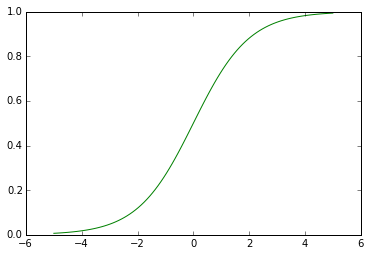

In [7]:
xx = np.linspace(-5, 5, 100)
plt.plot(xx, 1/(1 + np.exp(-1 * xx)), '-g')

### Non-linear Activation: Hyperbolic Tangent (Tanh)
$$ h_i= \mbox{tanh}(x_i)=\frac{\exp(x_i)-\exp(-x_i)}{\exp(x_i)+\exp(-x_i)} $$
$$ \textbf{h} = \mbox{tanh} \left(\textbf{x} \right) $$ 

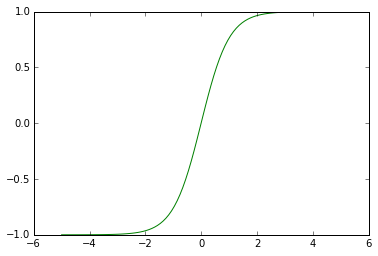

In [8]:
xx = np.linspace(-5, 5, 100)
plt.plot(xx, (np.exp(xx) - np.exp(-1 * xx))/(np.exp(xx) + np.exp(-1 * xx)), '-g')

### Non-linear Activation: Rectified Linear (ReLU)
$$ h_i= \mbox{ReLU}(x_i)=\max\left(x_i, 0 \right) $$
$$ \textbf{h} = \mbox{ReLU} \left(\textbf{x} \right) $$ 

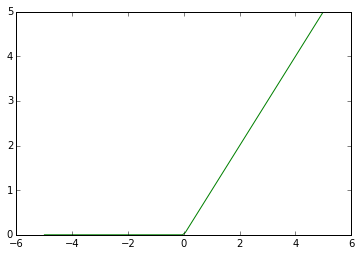

In [9]:
xx = np.linspace(-5, 5, 100)
plt.plot(xx, xx * (xx > 0).astype(np.int), '-g')

### Types of Layers: Softmax
$$ h_i = \frac{\exp(x_i)}{\sum_{j}\exp(x_j)} $$
$$ \textbf{h} = \mbox{Softmax}(\textbf{x}) $$
- Note: $h_i \geq 0$ and $\sum_{i}h_i=1$
- Useful for generating a multinomial distribution (classification)
![a](images/softmax_r60.png)

### Types of Losses: Squared Loss
$$ \mathcal{L}\left(\textbf{y},\hat{\textbf{y}}\right) = \frac{1}{2}\left\Vert \textbf{y}-\hat{\textbf{y}}\right\Vert^2_2 $$
$$ \frac{\partial\mathcal{L}}{\partial \hat{y}_i}=\hat{y}_i-y_i $$
$$ \nabla_{\hat{\textbf{y}}}\mathcal{L}=\hat{\textbf{y}}-\textbf{y} $$
- Used for regression problems

### Types of Losses: Cross Entropy
$$ \mathcal{L}\left(\textbf{y},\hat{\textbf{y}}\right) = -\sum_{i}y_i\log\hat{y}_i $$
$$ \frac{\partial\mathcal{L}}{\partial \hat{y}_i}=-\frac{y_i}{\hat{y}_i} $$
$$ \nabla_{\hat{\textbf{y}}}\mathcal{L}=-\frac{\textbf{y}}{\hat{\textbf{y}}}$$

- Measure distance between two multinomial distributions
- Used for classification problems
- Softmax layer is used as the output layer in general.
  - ex) $\textbf{y}=$[0 0 1], $\hat{\textbf{y}}=$[0.3 0.2 0.5]

In [10]:
resize("images/mlp", 60)
resize("images/mlp_standard", 70)

### Multi-layer Neural Network
- Consists of multiple (linear + non-linear activation) layers.
- Each layer learns a non-linear feature from its previous layer.
- Often called Multi-Layer Perceptron (MLP).
- 2-layer MLP with infinite number of hidden units can approximate any arbitrary function.
<img src="images/mlp.png" width=600px />

### Multi-layer Neural Network
- Simplified illustration that only shows edges with weights.
- We assume that each layer is followed by a non-linear activation function (except for the output layer).
<img src="images/mlp_standard.png" width=500px />

### Multi-layer Neural Network
- More simplified illustration
<img src="images/mlp_simple.png" width=500px />

### Multi-layer Neural Network
- Even more simplified illustration
<img src="images/mlp_simplest.png" width=500px />

### Outline

- Motivation
- Basics of Neural Networks
  - Forward Propagation
  - **Backward Propagation**
- Deep Neural Networks
  - Convolutional Neural Networks
  - Recurrent Neural Networks
- Applications
  - Computer Vision
  - Natural Language Processing
  - Reinforcement Learning

### Training Neural Networks
- Repeat until convergence
  - $(\textbf{x},\textbf{y}) \leftarrow$ Sample an example (or a mini-batch) from data
  - $\hat{\textbf{y}} \leftarrow f\left( \textbf{x} ; \theta \right)$ Forward propagation
  - Compute $\mathcal{L}\left(\textbf{y},\hat{\textbf{y}}\right)$
  - $\nabla_{\theta}\mathcal{L} \leftarrow$ Backward propagation
  - Update weights using (stochastic) gradient descent
      - $\theta \leftarrow \theta - \alpha \nabla_{\theta}\mathcal{L}$

### Training Neural Networks
<img src="images/forward_backward.png" width=800px />

### Idea of Back-Propagation
- Denote $x,h,\theta$ is the input, output, and parameter of a layer.
- It is non-trivial to derive the gradient of loss w.r.t. parameters in intermediate layers
![a](images/idea_backprop.png)

### Idea of Back-Propagation
- Assuming that $\frac{\partial \mathcal{L}}{\partial h}$ is given, use the **chain rule** to compute the gradients
$$\frac{\partial \mathcal{L}}{\partial \theta}=\frac{\partial \mathcal{L}}{\partial h}\frac{\partial h}{\partial \theta} \mbox{ , } \frac{\partial \mathcal{L}}{\partial x}=\frac{\partial \mathcal{L}}{\partial h}\frac{\partial h}{\partial \theta}$$
- Why compute $\frac{\partial \mathcal{L}}{\partial x}$? 
  - The previous layer needs it because $x$ is the output of the previous layer.
![a](images/idea_backprop2.png)

### Idea of Back-Propagation
<img src="images/nn_backward.png" width=500px />

### Idea of Back-Propagation
<img src="images/nn_backward_2.png" width=500px />

### Idea of Back-Propagation
<img src="images/nn_backward_3.png" width=500px />

### Idea of Back-Propagation
<img src="images/nn_backward_4.png" width=500px />

### Back-Propagation Algorithm
- Compute $\nabla_{\textbf{y}} \mathcal{L}=\left[\frac{\partial\mathcal{L}}{\partial y_1}, ..., \frac{\partial\mathcal{L}}{\partial y_n}\right]$ directly from the loss function.
- For each layer (from top to bottom) with output $\textbf{h}$, input $\textbf{x}$, and weights $\textbf{W}$,
  - Assuming that $\nabla_{\textbf{h}}\mathcal{L}$ is given, compute gradients using the **chain rule** as follows: 
$$\nabla_{\textbf{x}}\mathcal{L}=\nabla_{\textbf{h}}\mathcal{L}\nabla_{\textbf{x}}\textbf{h}$$
$$\nabla_{\textbf{W}}\mathcal{L}=\nabla_{\textbf{h}}\mathcal{L}\nabla_{\textbf{W}}\textbf{h}$$

In [11]:
resize("images/linear_back", 50)
resize("images/activation_back", 50)

### Practice: Linear
$$ h_i=\sum_{j}w_{ij}x_j + b_i \iff  \textbf{h} = \textbf{W}\textbf{x} + \textbf{b}$$ 
- Gradient w.r.t. parameters
$$ \frac{\partial \mathcal{L}}{\partial w_{ij}} = \frac{\partial \mathcal{L}}{\partial h_{i}}\frac{\partial h_i}{\partial w_{ij}}=\frac{\partial \mathcal{L}}{\partial h_{i}}x_j \iff \nabla_{\textbf{W}} \mathcal{L} = \nabla_{\textbf{h}}\mathcal{L}\textbf{x}^{\top}$$
$$ \nabla_{\textbf{b}} \mathcal{L} = \nabla_{\textbf{h}}\mathcal{L} $$
- Gradient w.r.t. inputs
$$ \frac{\partial \mathcal{L}}{\partial x_{j}} = \sum_{i} \frac{\partial \mathcal{L}}{\partial h_{i}}\frac{\partial h_i}{\partial x_{j}}=\sum_{i} \frac{\partial \mathcal{L}}{\partial h_{i}}w_{ij} \iff \nabla_{\textbf{x}} \mathcal{L} = \textbf{W}^{\top}\nabla_{\textbf{h}}\mathcal{L} $$
<img src="images/linear_back.png" width=800px />

### Practice: Sigmoid
$$ h_i=\sigma (x_i) = \frac{1}{1+\exp\left(-x_i\right)} \iff \textbf{h} = \sigma \left(\textbf{x} \right) $$ 

- Gradient w.r.t. inputs
$$ \frac{\partial \mathcal{L}}{\partial x_{i}} = \frac{\partial \mathcal{L}}{\partial h_{i}}\frac{\partial h_i}{\partial x_{i}}=\frac{\partial \mathcal{L}}{\partial h_{i}}\sigma(x_i)(1-\sigma(x_i))=\frac{\partial \mathcal{L}}{\partial h_{i}}h_i(1-h_i)$$
$$ \nabla_{\textbf{x}} \mathcal{L} = \nabla_{\textbf{h}}\mathcal{L} \odot \textbf{h} \odot (\textbf{1} - \textbf{h}) $$
<img src="images/activation_back.png" width=400px />

### Example Code (Torch/Lua)
```lua
require "torch"
require "nn"

dataX = torch.Tensor(1000, 3)
dataY = torch.Tensor(1000):random(2)
for iter=1,10000 do
    -- sample an example from a dataset
    idx = torch.random(1000)
    x = dataX[idx]
    y = dataY[idx]
    -- network construction
    model = nn.Sequential()
    model:add(nn.Linear(3,4))
    model:add(nn.Sigmoid())
    model:add(nn.Linear(4,3))
    model:add(nn.Sigmoid())
    model:add(nn.Linear(3,2))
    model:add(nn.LogSoftMax())
```

```lua
    -- loss function (cross entropy)
    criterion = nn.ClassNLLCriterion() 
    -- forward propagation
    y_pred = model:forward(x)
    loss = criterion:forward(y_pred, y)
    -- backward propagation
    model:zeroGradParameters() -- dL/dW = 0
    -- compute dL/dy
    dL_dy = criterion:backward(y_pred, y) 
    -- compute gradient w.r.t. weights
    model:backward(x, dL_dy) 
    -- SGD update with learning rate of 0.001
    model:updateParameters(0.001) 
end
```

### FAQ: Does neural network always have to be layer-structured?

- No. It can be any direcred acyclic graph (DAG).
- Example of a complex neural network
<img src="images/dag.png" width=300px />

### FAQ: How to define a new type of layer?

- We can define any type of layer as lon g as it is differentiable.
- Example) Addition layer
  - Forward: $\textbf{h} = \textbf{x}_1 + \textbf{x}_2$
  - Backward
    - $\nabla_{\textbf{x}_1}\mathcal{L} = \nabla_{\textbf{h}}\mathcal{L}\nabla_{\textbf{x}_1}\textbf{h}=\nabla_{\textbf{h}}\mathcal{L}$
    - $\nabla_{\textbf{x}_2}\mathcal{L} = \nabla_{\textbf{h}}\mathcal{L}\nabla_{\textbf{x}_2}\textbf{h}=\nabla_{\textbf{h}}\mathcal{L}$
<img src="images/addition.png" width=500px />

In [12]:
resize("images/weight_sharing", 30)

### FAQ: How to handle shared weights?

- To constrain $W_1=W_2=W$, we need $\Delta W_1 = \Delta W_2$.
- Compute $\nabla_{W_1}\mathcal{L}$ and $\nabla_{W_2}\mathcal{L}$ separately.
- Use $\nabla_{W}\mathcal{L}=\nabla_{W_1}\mathcal{L}+\nabla_{W_2}\mathcal{L}$ to update the shared weight.
- In practice, we accumulate gradients to the shared memory space for $\nabla_{W}\mathcal{L}$ during back-propagation.
- Weight sharing is used in *convolutional neural networks* and *recurrent neural networks*.
<img src="images/weight_sharing.png" width=600px />

### Outline

- Motivation
- Basics of Neural Networks
  - Forward Propagation
  - Backward Propagation
- **Deep Neural Networks**
  - Convolutional Neural Networks
  - Recurrent Neural Networks
- Applications
  - Computer Vision
  - Natural Language Processing
  - Reinforcement Learning

### What is "deep" neural network?
- A neural network is considered to be **deep** if it has more than two (non-linear) hidden layers.
- Hidden layers discover useful features directly from raw inputs.
- Higher layers learn more abstract and hierarchical features.
  - In a classification network, features become more **linearly-separable** as layer goes up
<img src="images/deep_nn.png" />

### What is "deep" neural network?
- Difficulties in training deep neural networks
  - Easy to overfit (The number of parameters is large)
  - Hard to optimize (highly non-convex optimization)
  - Computationally expensive (many matrix multiplications)
- Recent Advances
  - Large-scale dataset (e.g., 1M images in ImageNet)
  - Better regularization (e.g., Dropout)
  - Better optimization (e.g., RMSProp, ReLU) 
  - Better hardware (GPU for matrix computation)

### Popular Deep Architectures
- Convolutional Neural Network (CNN)
  - Widely used for image modeling
  - ex) object recognition, segmentation, vision-based reinforcement learning problems
- Recurrent Neural Network (RNN)
  - Widely used for sequential data modeling
  - ex) machine translation, image caption generation

### Outline

- Motivation
- Basics of Neural Networks
  - Forward Propagation
  - Backward Propagation
- Deep Neural Networks
  - **Convolutional Neural Networks**
  - Recurrent Neural Networks
- Applications
  - Computer Vision
  - Natural Language Processing
  - Reinforcement Learning

### Convolutional Neural Network
- A special kind of multi-layer neural network
- Designed to recognize visual patterns directly from raw pixels

In [13]:
resize("images/cnn_ex1", 40)
resize("images/cnn_ex2", 40)
resize("images/cnn_ex3", 50)
resize("images/cnn_ex4", 50)

### Multi-layer Perceptron (MLP)
- Consider 100x100 input pixels
- 1 hidden layer with 10000 hidden units
- **100M parameters** $\rightarrow$ infeasible!
$\rightarrow$ Pixels are locally correlated!
<img src="images/cnn_ex1.png" width=500px />

### Locally-connected Neural Network
- Consider 100x100 input pixels
- Each unit is connected to 10x10 pixels.
- 10000 hidden units
- **1M parameters** $\rightarrow$ still too large
- Each unit extracts a local pattern from the image.
<img src="images/cnn_ex2.png" width=500px />

### Convolutional Neural Network (one filter)
- Consider 100x100 input pixels
- Apply the **same filter (weight)** over the entire image.
- Hidden units form a 100x100 **feature map**.
- 10x10 parameters. <br />
$\rightarrow$ **only captures a single local pattern.**
<img src="images/cnn_ex3.png" width=800px />

### Convolutional Neural Network (multiple filters)
- 100x100 input pixels
- Apply K number of 10x10 filters. 
- Hidden units form a Kx100x100 feature map.
- Kx10x10 parameters. <br />
<img src="images/cnn_ex4.png" width=800px />

In [14]:
resize("images/convolution_multi", 50)

### Typical Deep CNN Architecture
<img src="images/typical_cnn.png" width=800px />

### Details of Convolution
<img src="images/convolution_step1.png" width=800px />

### Details of Convolution: Convolutional Filtering
- A filter has $\textbf{W} \in \mathbb{R}^{h \times w}$ weights (bias is omitted for simplicity).
- Compute inner products between $\textbf{W}$ and $h \times w$ input patches by sliding window.
  - The same weight is shared across the entire image.
- Apply $K$ different filters $\rightarrow$ produces a 3D feature map (stacked through channels).
- The following animation shows the simplest case: one-channel input, one filter
![](images/convolution.gif)
<span style="color:gray; font-size:10px; float:right">(Figure from Stanford UFLDL Tutorial)</span>

### Details of Convolution: Convolutional Filtering
- In general, an input consists of multiple channels.
  - Each filter has $\textbf{W} \in \mathbb{R}^{c \times h \times w}$ weight ($c$: \#channels of input).
- Hyperparameters: num of filters, size of filters
- The general case: multi-channel input, mutilple filters
<img src=images/convolution_multi.png width=500px />
<span style="color:gray; font-size:10px; float:right">(Figure from Stanford UFLDL Tutorial)</span>

### Details of Convolution: Non-linearity
- Method: Just apply non-linear function (e.g., Sigmoid, ReLU)
- ReLU is preferred because it makes optimization easier.
<img src="images/convolution_step2.png" width=800px />

### Details of Convolution: Pooling
<img src="images/convolution_step3.png" width=800px />

### Details of Convolution: Pooling
- Method: Take average or maximum over the input feature.
- Outcome
  - Shrink the number of hidden units.$\rightarrow$ reduces the number of parameters at the end.
  - Make features robust to small translations of image.
- Hyperparameters: pooling method (avg or max), pooling size
- Often called "sub-sampling"
<img src=images/pooling.gif width=600px />

### Illustration of Deep CNN
- Feature map becomes smaller in the higher layer due to pooling.
- A hidden unit in higher layer captures a pattern from a larger input patch.
<img src=images/deep_cnn.png />
<span style="color:gray; font-size:10px; float:right">(Figure from Yann LeCun)</span>

### Example Code (Torch/Lua)
```lua
require "torch"
require "nn"
model = nn.Sequential()
-- 1st convolution: 3 -> 64 (5x5 filters)
model:add(nn.SpatialConvolution(3, 64, 5, 5))
model:add(nn.ReLU())
model:add(nn.SpatialMaxPooling(2,2,2,2))
-- 2nd convolution: 64 -> 64 (5x5 filters)
model:add(nn.SpatialConvolution(64, 64, 5, 5))
model:add(nn.ReLU())
model:add(nn.SpatialMaxPooling(2,2,2,2))
-- 3rd linear: 64*5*5 -> 128 hidden units
-- Reshape 3D map to a long vector
model:add(nn.View(64*5*5)) 
model:add(nn.Linear(64*5*5, 128))
model:add(nn.ReLU())
-- 4th linear: 128 -> 10 classes
model:add(nn.Linear(128, 10))
model:add(nn.LogSoftMax()))
```

### What is learned by CNN? Filter Visualization
- Train a deep CNN on *ImageNet* (1.2M images, 1000 classes)
- Perform forward propagations from many examples
- Find image patches that strongly activates a specific feature map (filter)
- Reconstruct the input patch from the feature map
- Proposed by Zeiler and Fergus (ECCV 2014)
<img src=images/deep_cnn.png />
<span style="color:gray; font-size:10px; float:right">(Figure from Yann LeCun)</span>

### Filter Visualization: 1st and 2nd Layer
<img src=images/cnn_visualization1.png width=800px />

### Filter Visualization: 3rd Layer
- Shows more complex patterns
<img src=images/cnn_visualization2.png width=1000px />

### Filter Visualization: 4th Layer
- More class-specific
<img src=images/cnn_visualization3.png width=1000px />

### Filter Visualization: 5th Layer
- Shows entire objects with pose variations
- Each filter can be viewed as a part detector. (e.g., dog face, text, animal leg)
<img src=images/cnn_visualization4.png width=1000px />

### Comparison to Traditional Approach
<img src=images/cnn_comparison.png width=1000px />

### ImageNet Classification 2012
- AlexNet (7 layers, Krizhevsky et al.) achieves 16.4% error.
- The next best model (non-CNN) achieves 26.2% error.
![](images/imagenet.jpg)
![](images/alexnet.png)
<span style="color:gray; font-size:10px; float:right">(Figure from Alex Krizhevsky et al.)</span>

### ImageNet Classification
- ImageNet 2013: Clarifi (7 layers) $\rightarrow$ 14.8% error

- ImageNet 2014: GoogLeNet (22 layers) $\rightarrow$ 4.9% error (Human: 5.1% error)

- ImageNet 2015: ResNet (152 layers!) $\rightarrow$ 3.5% error

### Feature Generalization: Dataset
- Pre-train a CNN on a large-scale dataset (ImageNet) and **train only the final linear layer** on another dataset.
- Achieves state-of-the-art results on small datasets (e.g., Caltech-101).
- The learned features can generalize to any dataset.
<img src=images/cnn_generalization1.png width=900px />

### Feature Generalization: Task
- Use high-level features as input for other tasks.
<img src=images/cnn_generalization2.png width=900px />

### Feature Generalization: Task
- Achieves state-of-the-art results on many other vision tasks.
  -  ex) object detection, segmentation, depth map prediction, image caption generation
- A CNN trained on large-scale classification dataset learns a generic feature that can be used for many different vision tasks.
<img src=images/cnn_generalization3.png width=900px />

### Summary of CNN
- Convolutional Neural Network: a special kind of neural network with local connectivity and weight sharing.
- Achieves state-of-the-art performances on many different tasks
- Higher layers extract high-level features (e.g., dog).
- Learned features can be generalized to other datasets and tasks.